In [1]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import pandas as pd

In [2]:
mercari_df = pd.read_csv(r'..\999_동영상 연습예제\8장\mercari-price-suggestion-challenge\train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head()

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

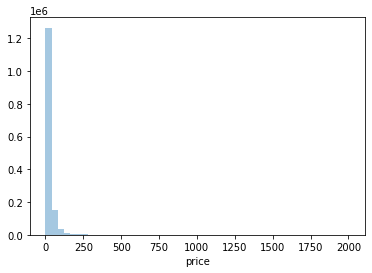

In [5]:
y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

In [6]:
import numpy as np

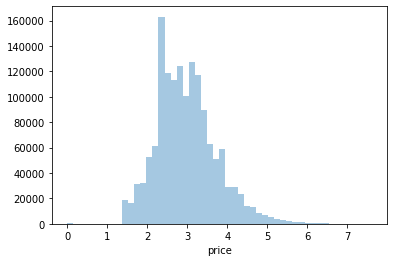

In [7]:
y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [8]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head()

0    2.397895
1    3.970292
2    2.397895
3    3.583519
4    3.806662
Name: price, dtype: float64

In [9]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [10]:
mercari_df['item_description'].value_counts()

No description yet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               82489
New                                                                                                                                              

In [11]:
boolean_cond = mercari_df['item_description'] == 'No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [12]:
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null','Other_Null']

mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

print('대분류 유형 : \n', mercari_df['cat_dae'].value_counts())
print('중분류 유형 : \n', mercari_df['cat_jung'].nunique())
print('소분류 유형 : \n', mercari_df['cat_so'].nunique())

대분류 유형 : 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 유형 : 
 114
소분류 유형 : 
 871


In [13]:
mercari_df['category_name'].apply(lambda x : split_cat(x))

0                                      [Men, Tops, T-shirts]
1          [Electronics, Computers & Tablets, Components ...
2                            [Women, Tops & Blouses, Blouse]
3                     [Home, Home Décor, Home Décor Accents]
4                                [Women, Jewelry, Necklaces]
5                                      [Women, Other, Other]
6                               [Women, Swimwear, Two-Piece]
7                        [Sports & Outdoors, Apparel, Girls]
8                        [Sports & Outdoors, Apparel, Girls]
9               [Vintage & Collectibles, Collectibles, Doll]
10                                    [Beauty, Makeup, Face]
11                                [Beauty, Fragrance, Women]
12                        [Women, Dresses, Above Knee, Mini]
13                 [Other, Office supplies, School Supplies]
14                                     [Women, Shoes, Boots]
15                             [Beauty, Makeup, Makeup Sets]
16                      

In [14]:
mercari_df['cat_dae']

0                             Men
1                     Electronics
2                           Women
3                            Home
4                           Women
5                           Women
6                           Women
7               Sports & Outdoors
8               Sports & Outdoors
9          Vintage & Collectibles
10                         Beauty
11                         Beauty
12                          Women
13                          Other
14                          Women
15                         Beauty
16                         Beauty
17                           Kids
18                         Beauty
19                          Women
20                          Women
21                          Women
22                    Electronics
23                    Electronics
24                          Women
25                            Men
26                    Electronics
27                          Women
28                          Women
29            

In [15]:
arg1, arg2, arg3 = zip(*['Men', 'Tops', 'T-shirts'])

In [16]:
arg1

('M', 'T', 'T')

In [17]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [18]:
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts())

brand name 의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null                   632682
PINK                          54088
Nike                          54043
Victoria's Secret             48036
LuLaRoe                       31024
Apple                         17322
FOREVER 21                    15186
Nintendo                      15007
Lululemon                     14558
Michael Kors                  13928
American Eagle                13254
Rae Dunn                      12305
Sephora                       12172
Coach                         10463
Disney                        10360
Bath & Body Works             10354
Adidas                        10202
Funko                          9237
Under Armour                   8461
Sony                           7994
Old Navy                       7567
Hollister                      6948
Carter's                       6385
Urban Decay                    6210
The North Face                 6172
Independent                    5902
Too Faced    

In [19]:
mercari_df['brand_name'].unique()

array(['Other_Null', 'Razer', 'Target', ..., 'Astroglide',
       'Cumberland Bay', 'Kids Only'], dtype=object)

In [20]:
print('name 의 종류 개수:', mercari_df['name'].nunique())
print('name sample 10건 : \n', mercari_df['name'][:10])

name 의 종류 개수: 1225273
name sample 10건 : 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [21]:
pd.set_option('max_colwidth', 200)

print('item_description 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [22]:
mercari_df['item_description'].str.len().mean()

145.7113889385411

In [23]:
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df['name'])

tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_descroption vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_descroption vectorization shape: (1482535, 50000)


In [24]:
from sklearn.preprocessing import LabelBinarizer

lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_dae.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_dae.fit_transform(mercari_df['cat_so'])

In [25]:
print(type(X_brand), type(X_item_cond_id))
print('X_brand shape:{0},X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape:(1482535, 4810),X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [26]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, \
                     X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)
del X_features_sparse

gc.collect()


<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


60

In [31]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [28]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    X=hstack(matrix_list).tocsr()
    
    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train
    gc.collect()
    
    return preds, y_test

In [33]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(linear_model, sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))

Item Description을 포함한 rmsle 값: 0.5013207260753977
Item Description을 포함한 rmsle 값: 0.4709928263198932


In [ ]:
from lightgbm import LGBMRegressor

sparse_martix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))